# **Taller 2**

Santiago Garcia S.

## **Introduccion**

Dentro del procesamiento de datos secuenciales esta el procesamiento del Lenguaje. El NLP (por sus siglas en igles) a sus inicios presento problemas puesto que al inicio utilizaba el significado intrinceco de las palabras dentro de las oraciones y no como tal su intencion de comunicar una idea, de alli nace la necesidad de usar metodos mas rubustos para ayudar a la maquina a comprender la intencion de las oraciones por ello para el NLP se han usado tecnicas de redes neuronales y deeplearning para dar mejores respuestas a la tarea de comprender el idioma.

Actualmente el NLP tiene varias aplicaciones en la vida cotidiana, como correccion de ortografia, busqueda de informacion (motores de busqueda como google), clasificacion de texto, encontrar palabras clave (usado en marketing)
entre otras aplicaiones.

Este taller pretende demostar los usos practicos del NLP usando en primera instancia un Chatbot y en segundo lugar ver como se pueden procesar una base de datos para poder predecir el sentimineto de una oracion escrita en redes sociales.

## **Marco Teorico**

El NLP (Neural Lenaguaje Processing) es una rama del machine learning la cual se encarga de brindar una interaccion natural entre el humano y la computadora por medio del lenguaje propio del humano, para lograr esto los cientificos informaticos han usado tecnicas estadisticas y el analisis del propio lenguaje humano para crear modelos y tecnicas cada vez mejores para que las maquinas puedan procesar el lenguaje humano como el analisis semantico, extraccion de informacion, reonocimiento de identidades etc.

Un gran avance para el procesamiento de datos secuenciales fue la creacion de las redes neuronales transformers, estas eliminan la necesidad de usar redes recurrentes, estas redes se encargan de transformar una secuencia de entrada en una de salida por medio de una comprension del contexto de la secuencia y de rastrear relaciones entre los componentes de las secuencias lo que resulta util en la comprension del lenguaje pues en frases y oraciones pues los elementos de estas tienen relaciones de posesion, de accion de tiempo etc.

El ultimo gran paso en el NLP fue la introduccion de los modelo GPT, el cual usa redes transformers entrenadas para generar respuestas coherentes a preguntas de  los usuarios, usados para consultas, preguntar datos random, ayuda a los cientificos en la investigacion, ayuda a los programadores a resolver dudas sobre el uso de librerias, dependencias etc. Por su parte los Chatbots son muy utiles para la empresas pues una IA es capaz de gestionar solicitudes de usuarios, respoder preguntas sobre sus servicios, estos chatbots son muy vistos en aplicaciones como Rappi, aplicaciones de bancos, call centers de algunas compañias telefonicas etc.

## **Problema a solucionar**

Dentro de los problemas que puede resolver el NLP estan los chatbots, muy utiles para las empresas pues ayuda a resolver problemas leves que los clientes de la empresa pueden presentar haciendo que personas especializadas se centren en aquellos problemas que realmente el Chatbot, debido a limitaciones tecnicas o bien por preferencias de los clientes estos no pueden resolverlos.

Otro problema que tambien es normal en plataformas como Amazon, mercado libre, E-Commerce, incluso en aplicaciones de restaurantes donde se puede dejar comentarios, es conocer la satisfaccion de los clientes y la forma mas efectiva es analizar los comentarios y reseñas de los productos y los servicios con el fin de que los establecimientos puedan mejorar sus servicios.

## **Punto 1**
Crear modelo Chat bot con Open AI

In [ ]:
!pip install openai

In [ ]:
import openai


In [ ]:
# client = OpenAI(api_key='')
# Github no permite subir el archivo si tiene la API activa

In [ ]:
def generar_respuesta(prompt):
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}])
    return response.choices[0].message.content

In [ ]:
while True:
    usuario_input = input("Tú: ")
    if usuario_input.lower() == 'adiós' or usuario_input.lower() == 'chao' or usuario_input.lower() == 'adios':
        print("R2D2: ¡Adiós! Hasta luego.")
        break
    respuesta = generar_respuesta(usuario_input)
    print("R2D2:", respuesta)

Tú: hola
R2D2: ¡Hola! ¿Cómo puedo ayudarte hoy?
Tú: corije lah siguente frace: ayer comer pan, hoy comi sopa y manana comer arros
R2D2: Ayer comí pan, hoy comí sopa y mañana comeré arroz.
Tú: chao
R2D2: ¡Adiós! Hasta luego.


### **Resulstados**

Se puede ver que los resultados de la API son bastante buenos, cabe aclarar que los resultados son similares a los de usar Chat GPT pues usan el mismo modelo para la resolucion de las preguntas, sin embargo no dera respuestas 100% correctas en todos los casos y como tal es una advertencia que los mismos creadores hacer al usar estas herramientas, de que la informacion que da un chatbot de este estilo no siempre es correcta debido a que la misma IA se alimenta de los datos y solo es capaz de resumir mas no de comprender la informacion con la profundidad con la que la hace un humano

### **Link video punto 1: https://youtu.be/QzTLCy0Cp7E**

## **Punto 2**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
nltk.download('punkt')
nltk.downloader.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Especializacion/Taller2/train.csv',sep=';',header=0,names=['text','sentiment'])
test = pd.read_csv('/content/drive/MyDrive/Especializacion/Taller2/test.csv',sep=';',header=0,names=['text','sentiment'])
validation = pd.read_csv('/content/drive/MyDrive/Especializacion/Taller2/val.csv',sep=';',header=0,names=['text','sentiment'])

In [3]:
train['feedback'] = [1 if train.iloc[i,1]=='sadness' else
                     2 if train.iloc[i,1]=='anger' else
                     3 if train.iloc[i,1]=='fear' else
                     4 if train.iloc[i,1]=='love' else
                     5 if train.iloc[i,1]== 'surprise' else 0 for i in range(len(train['sentiment']))]
train.head(4)

,text,sentiment,feedback
0,i can go from feeling so hopeless to so damned...,sadness,1
1,im grabbing a minute to post i feel greedy wrong,anger,2
2,i am ever feeling nostalgic about the fireplac...,love,4
3,i am feeling grouchy,anger,2


<Axes: xlabel='sentiment'>

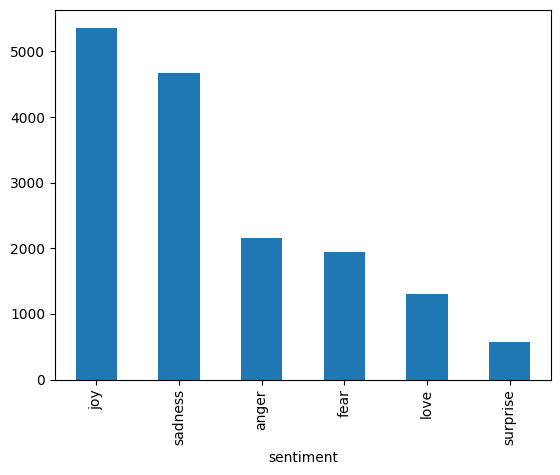

In [4]:
train['sentiment'].value_counts().plot(kind='bar')

<Axes: xlabel='feedback'>

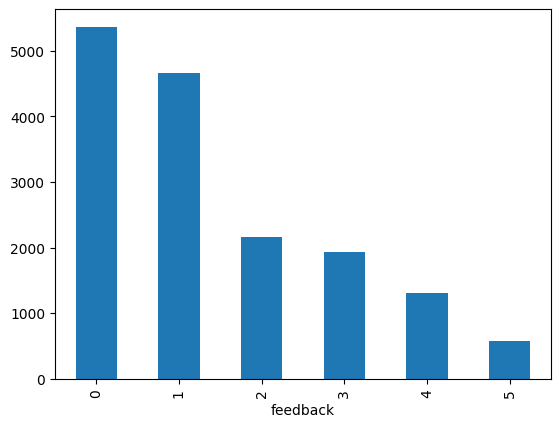

In [5]:
train['feedback'].value_counts().plot(kind='bar')

In [6]:
stop = stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()
def tokens(data,columna):
    data['minuscula'] = data[columna].str.lower()
    data['no_stop'] = data['minuscula'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
    data['token'] = data.apply(lambda row: nltk.word_tokenize(row['no_stop']), axis=1)
    data['alfas'] = data['token'].apply(lambda x: [word for word in x if word.isalpha()])
    data['lamatizado'] = data['alfas'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])
    # data['tokens'] = data['no_stop'].apply(lambda x: [tokenizer(data['lamatizado'][i])] for i in x)
    return data

In [7]:
train_tokens = tokens(data=train,columna='text')
test_tokens = tokens(data=test,columna='text')
validation_tokens = tokens(data=validation,columna='text')

In [8]:
train_tokens.head(4)

,text,sentiment,feedback,minuscula,no_stop,token,alfas,lamatizado
0,i can go from feeling so hopeless to so damned...,sadness,1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...,"[go, feeling, hopeless, damned, hopeful, aroun...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feeling, hopeless, damned, hopeful, aroun..."
1,im grabbing a minute to post i feel greedy wrong,anger,2,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong,"[im, grabbing, minute, post, feel, greedy, wrong]","[im, grabbing, minute, post, feel, greedy, wrong]","[im, grabbing, minute, post, feel, greedy, wrong]"
2,i am ever feeling nostalgic about the fireplac...,love,4,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...,"[ever, feeling, nostalgic, fireplace, know, st...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feeling, nostalgic, fireplace, know, st..."
3,i am feeling grouchy,anger,2,i am feeling grouchy,feeling grouchy,"[feeling, grouchy]","[feeling, grouchy]","[feeling, grouchy]"


In [9]:
train_tokens['no_stop'][0]

'go feeling hopeless damned hopeful around someone cares awake'

In [10]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(train_tokens['text'].values)
X = tokenizer.texts_to_sequences(train_tokens['text'].values)
X = pad_sequences(X)

In [11]:
embed_dim = 128
lstm_out = 196
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 61, 128)           256000    
                                                                 
 spatial_dropout1d (Spatial  (None, 61, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 6)                 1182      
                                                                 
Total params: 511982 (1.95 MB)
Trainable params: 511982 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [12]:
Y = pd.get_dummies(train_tokens['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(12799, 61) (12799, 6)
(3200, 61) (3200, 6)


In [13]:
train_tokens['sentiment'][1]

'anger'

In [14]:
Y[1]

array([ True, False, False, False, False, False])

In [15]:
batch_size = 128
model.fit(X_train, Y_train, epochs =15, batch_size=batch_size)

Epoch 1/15
100/100 [==============================] - 105s 988ms/step - loss: 1.5596 - accuracy: 0.3693
Epoch 2/15
100/100 [==============================] - 76s 760ms/step - loss: 0.9764 - accuracy: 0.6607
Epoch 3/15
100/100 [==============================] - 79s 786ms/step - loss: 0.4737 - accuracy: 0.8423
Epoch 4/15
100/100 [==============================] - 87s 875ms/step - loss: 0.2649 - accuracy: 0.9099
Epoch 5/15
100/100 [==============================] - 91s 908ms/step - loss: 0.1984 - accuracy: 0.9276
Epoch 6/15
100/100 [==============================] - 96s 954ms/step - loss: 0.1669 - accuracy: 0.9401
Epoch 7/15
100/100 [==============================] - 93s 927ms/step - loss: 0.1360 - accuracy: 0.9478
Epoch 8/15
100/100 [==============================] - 87s 871ms/step - loss: 0.1233 - accuracy: 0.9523
Epoch 9/15
100/100 [==============================] - 95s 938ms/step - loss: 0.1110 - accuracy: 0.9561
Epoch 10/15
100/100 [==============================] - 104s 1s/step - lo

In [16]:
validation_size = 1500
X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

14/14 - 2s - loss: 0.2454 - accuracy: 0.9194 - 2s/epoch - 158ms/step
score: 0.25
acc: 0.92


In [17]:
from transformers import pipeline
pipe = pipeline("translation", model="Helsinki-NLP/opus-mt-es-en")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
ejemplo =  input("Escribe una idea: ")
ejemplo = pipe(ejemplo)
ejemplo = ejemplo[0]['translation_text']
ejemplo = [ejemplo]
ejemplo = tokenizer.texts_to_sequences(ejemplo)
ejemplo = pad_sequences(ejemplo, maxlen=61, dtype='int32', value=0)
sentiment = model.predict(ejemplo,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("anger")
elif (np.argmax(sentiment) == 1):
    print("fear")
elif (np.argmax(sentiment) == 2):
    print("joy")
elif (np.argmax(sentiment) == 3):
    print("love")
elif (np.argmax(sentiment) == 4):
    print("sadness")
elif (np.argmax(sentiment) == 5):
    print("surprise")


Escribe una idea: Mi madre murio ayer, estoy triste
1/1 - 0s - 29ms/epoch - 29ms/step
sadness


### **Resulstados**

Al entrenar un modelo pre-entrenado con un data ser diferente se aprecia que el uso de transferlearning es una tecnica muy util para crear modelos personalizados y muy precisos sin recurrir al uso de largas seciones de entrenamiento las cuales gastan energia y recursos computacionales que la mayoria de personas no poseen.

Otro resultado satisfactorio es ver como el Pipeline para traduccion de texto funciona de manera muy optima sin la necesidad de hacer una comparacion entre significados y sentido semantico entre palabras en ingles y español, sino que dentro del mimo pipeline este proceso ya esta hecho y lo unico que se hace es pasar el texto a traducri

### **Link Video punto 2: https://youtu.be/VPXGNY9YJrc**


## **Conclusiones**

En base a la aplicacion de un modelo basado en GPT y un modelo entrenado usando transfer learning es posible generar aplicaciones que sean capaces de entender las intenciones de un usuario como crear pipelines para el analsisis de comentarios de clientes hechos en paginas de ecommerce, redes sociales, correos para sugerencias etc.

Tambien es importante mencionar que por mejor que un modelo este pre-entrenado si este no tiene una buena base de datos como punto de partida y la persona que use la red neuronoal no sepa como procesar los datos el modelo no podra tener el mejor desempeño. Esto se evidendia en la parte de la prediccion del modelo, pues al inicio debido a un error en los condicionales el codigo arrojaba una respusta incorrecta y no porque el modelo estuviera mal sino porque los condicionales estaban errados, tambien se pude dar que un mal procesado en los  datos o en la transformacion para generar el enteno y el testeo lo que puede llegar a generar errore dentro de la red neuronal, finalmente otro problema encontrado en el punto 2 es el sesgo que tiene la base de datos al tener dos emociones predominantes en su base de datos, por lo que muchos de los resultados pueden tender a ser etiquetados como una emocion similar a la realmente expresada, en este caso emociones como *fear*, *anger* se pueden interpretar como *sadness* y emociones como *love* y *surprise* se puede interpretar como *joy*

## **Referencias y herramientas**

* https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

* https://platform.openai.com/playground/chat

* https://www.youtube.com/watch?v=6A2w-KYG4Ko

* https://github.com/pik1989/Sentiment-Analysis

* https://www.nltk.org/

* https://huggingface.co/docs/transformers/index

* https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest

